# EDA on the full dataset
that includes the scraped data and version counts

Obtained with `get_df.py`

## Load data

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.plotting.register_matplotlib_converters()

import numpy as np
import seaborn as sns
import missingno as mgn

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "simple_white"

In [3]:
df = pd.read_csv('../data/aggr_data.csv', parse_dates=['date', 'publish_date'])
df.drop('old_index', axis=1, inplace=True)

In [ ]:
page106523 = df.query('page_id == 106523')

In [7]:
pyg.walk(df.query('page_id == 106523'))

Box(children=(HTML(value='<div id="ifr-pyg-00061546850649b4SdCDgQYLu0ZrW6tH" style="height: auto">\n    <head>…

In [ ]:
df.query('page_id == 106523')

In [ ]:
df = pd.read_csv('../data/full_data.csv', parse_dates=['date', 'publish_date'])
df.drop('old_index', axis=1, inplace=True)

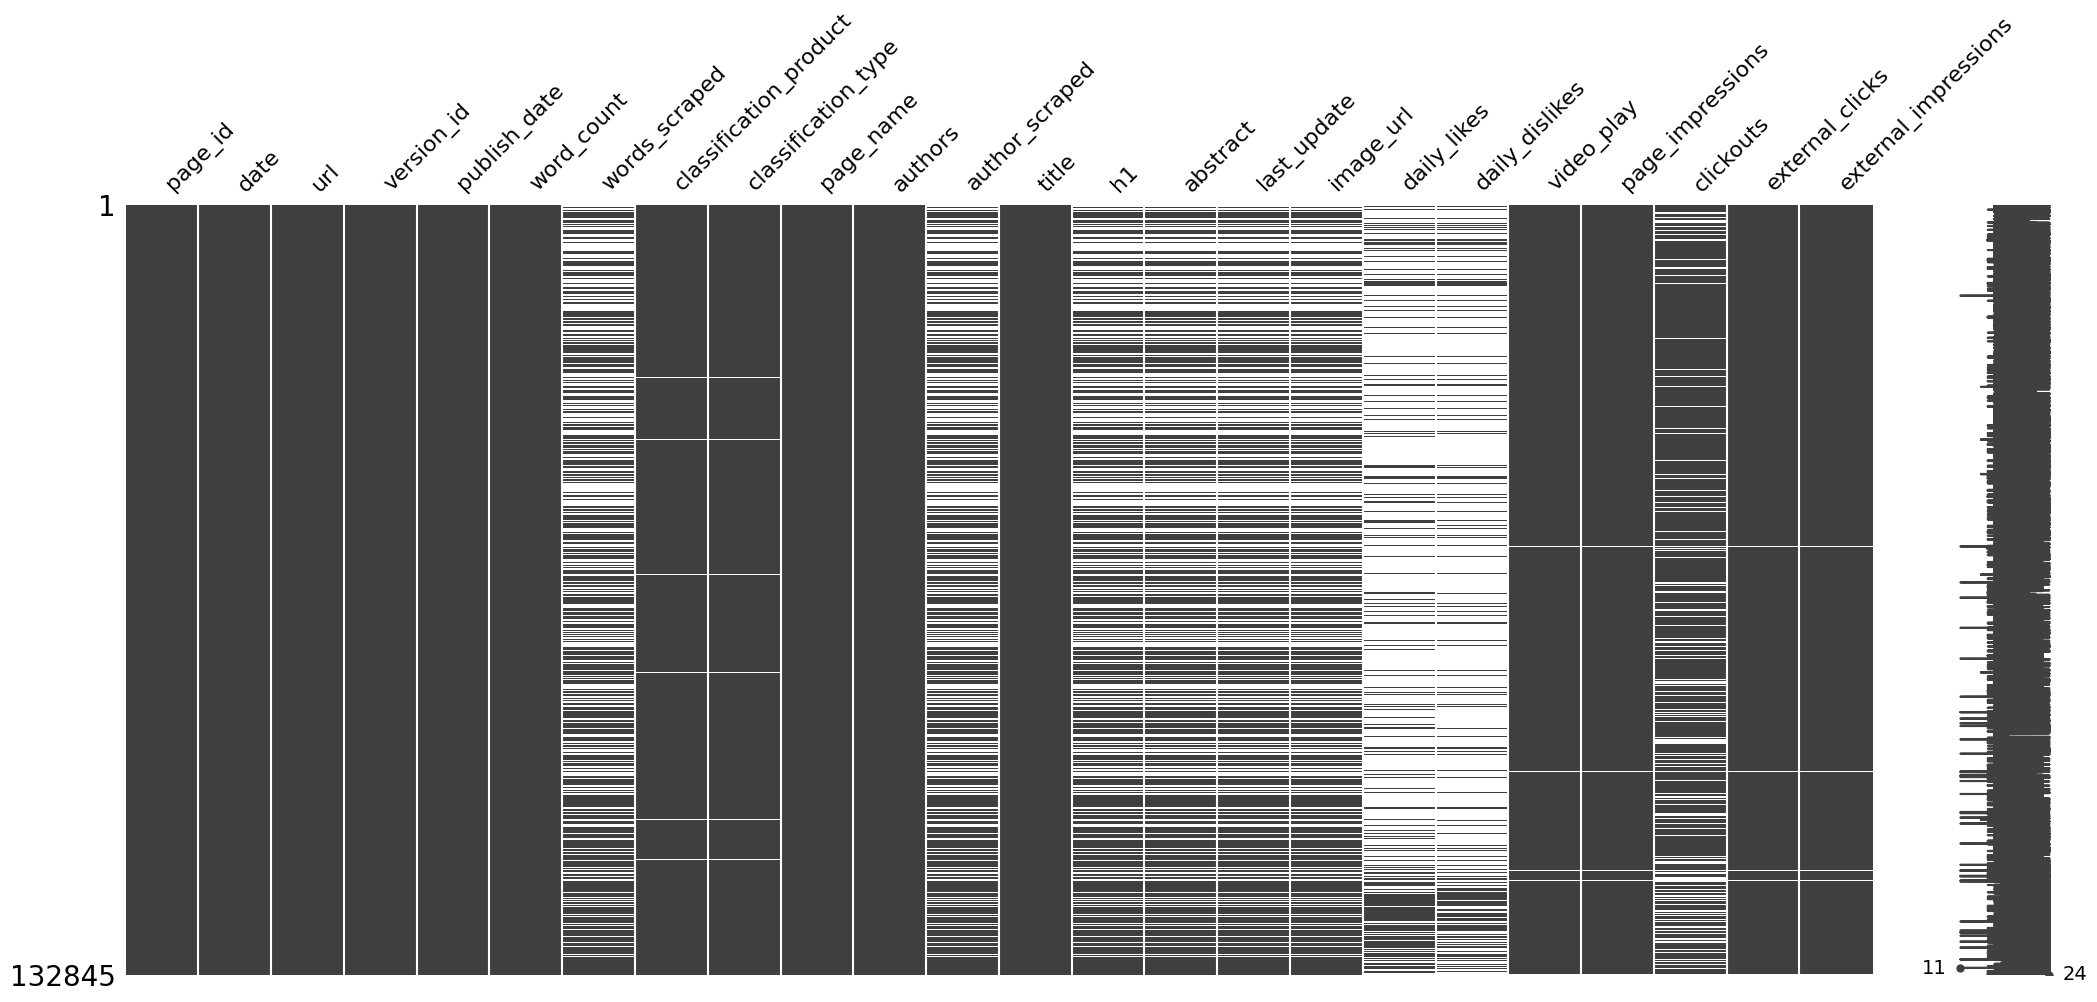

In [6]:
mgn.matrix(df);

In [15]:
df.columns 

## Exploring the influence of content changes

In [7]:
df.version_id.max()

63

In [107]:
COUNT_THRESH = 40
vers_ = df.groupby('page_id')['version_id'].max()
vers_[vers_ > COUNT_THRESH]

page_id
103963     45
105259     63
106523     60
109751     53
1011511    48
1012483    53
1012593    45
Name: version_id, dtype: int64

In [108]:
pages_frequent = vers_[vers_ > COUNT_THRESH].index

df_frequent = df.query('page_id in @pages_frequent')

In [109]:
df_frequent.page_id.unique().shape # only 7 pages, great!

(7,)

In [110]:
df_frequent.columns

Index(['page_id', 'date', 'url', 'version_id', 'publish_date', 'word_count',
       'words_scraped', 'classification_product', 'classification_type',
       'page_name', 'authors', 'author_scraped', 'title', 'h1', 'abstract',
       'last_update', 'image_url', 'daily_likes', 'daily_dislikes',
       'video_play', 'page_impressions', 'clickouts', 'external_clicks',
       'external_impressions'],
      dtype='object')

In [111]:
df_frequent[['page_id', 'date', 'external_impressions']].drop_duplicates() #.groupby(['page_id', 'date']).max() 

,page_id,date,external_impressions
3795,103963,2023-06-07,92954.0
3797,103963,2023-06-08,65014.0
3800,103963,2023-06-09,116658.0
3803,103963,2023-06-10,24020.0
3806,103963,2023-06-11,4936.0
...,...,...,...
69282,1012593,2024-03-19,3373.0
69283,1012593,2024-03-20,3133.0
69285,1012593,2024-03-21,1598.0
69286,1012593,2024-03-22,1660.0


In [112]:
df_frequent = df_frequent.drop_duplicates().fillna(0)

In [113]:
version_user_side_ftrs = ['page_id', 'date', 'url', 'version_id', 'publish_date',
       'word_count','daily_likes', 'daily_dislikes', 'video_play', 'page_impressions', 'clickouts',
       'external_clicks', 'external_impressions' ]

In [114]:
df_frequent.date.min()

Timestamp('2023-01-01 00:00:00')

In [115]:
timeline = pd.date_range(start=df_frequent.date.min(), end=df_frequent.date.max(), freq='D')
timeline

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-03-14', '2024-03-15', '2024-03-16', '2024-03-17',
               '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21',
               '2024-03-22', '2024-03-23'],
              dtype='datetime64[ns]', length=448, freq='D')

In [139]:
data = df_frequent[['page_id', 'date', 'external_clicks']].groupby(['page_id', 'date'], as_index=False).sum()
#df_frequent[['page_id', 'date', 'external_clicks']].groupby(['page_id', 'date'], as_index=False).sum()
data

,page_id,date,external_clicks
0,103963,2023-06-07,13074.0
1,103963,2023-06-08,11058.0
2,103963,2023-06-09,31185.0
3,103963,2023-06-10,5400.0
4,103963,2023-06-11,900.0
...,...,...,...
1532,1012593,2024-03-19,216.0
1533,1012593,2024-03-20,404.0
1534,1012593,2024-03-21,105.0
1535,1012593,2024-03-22,115.0


In [146]:
data = df_frequent[['page_id', 'date', 'external_impressions']].groupby(['page_id', 'date'], as_index=False).sum()

px.bar(data_frame=data, x='date', y='external_impressions', 
           color=data['page_id'].astype('str'),
           title=f'Ext. page impressions for pages with more than {COUNT_THRESH} versions'

           #color_discrete_map=px.colors.qualitative.Alphabet
           #color_continuous_scale=px.colors.make_colorscale(['red', 'darkblue'])
           #color_continuous_scale=px.colors.named_colorscales('Portland')
           #template='plotly-dark'
           )

In [153]:
data = df_frequent[['page_id', 'date', 'page_impressions']].groupby(['page_id', 'date'], as_index=False).sum()

px.bar(data_frame=data, x='date', y='page_impressions', 
           color=data['page_id'].astype('str'),
           title=f'Internal (Total) impressions for pages with more than {COUNT_THRESH} versions'
           )

In [147]:
data = df_frequent[['page_id', 'date', 'external_clicks']].groupby(['page_id', 'date'], as_index=False).sum()

px.bar(data_frame=data, x='date', y='external_clicks', 
           color=data['page_id'].astype('str'),
           title=f'Ext. page clicks for pages with more than {COUNT_THRESH} versions'

           )

In [152]:
data = df_frequent[['page_id', 'date', 'page_impressions']].groupby(['page_id', 'date'], as_index=False).sum()

px.bar(data_frame=data, x='date', y='page_impressions', 
           color=data['page_id'].astype('str'),
           title=f'Internal (Total) impressions for pages with more than {COUNT_THRESH} versions'
           )

In [148]:
data = df_frequent[['page_id', 'date', 'video_play']].groupby(['page_id', 'date'], as_index=False).sum()

px.bar(data_frame=data, x='date', y='video_play', 
           color=data['page_id'].astype('str'),
           title=f'Video plays for pages with more than {COUNT_THRESH} versions'
           )